# ML-2 (Predicting Customer Churn using Logistic Regression)
# AKASH NALLAGONDA, INDRA SUNEEL, SAHASTRA VADDE
## ALL MEMBERS CONTRIBUTED EQUALLY IN THE TEAM

## Step 1: Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

# Load dataset from your GitHub repository
url = "https://raw.githubusercontent.com/Akash346/Predicting-Customer-Churn-using-Logistic-Regression/main/Telco_customer_churn.xlsx"
data = pd.read_excel(url)

# Display the first few rows of the dataset
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## •	Explore the Data

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.00

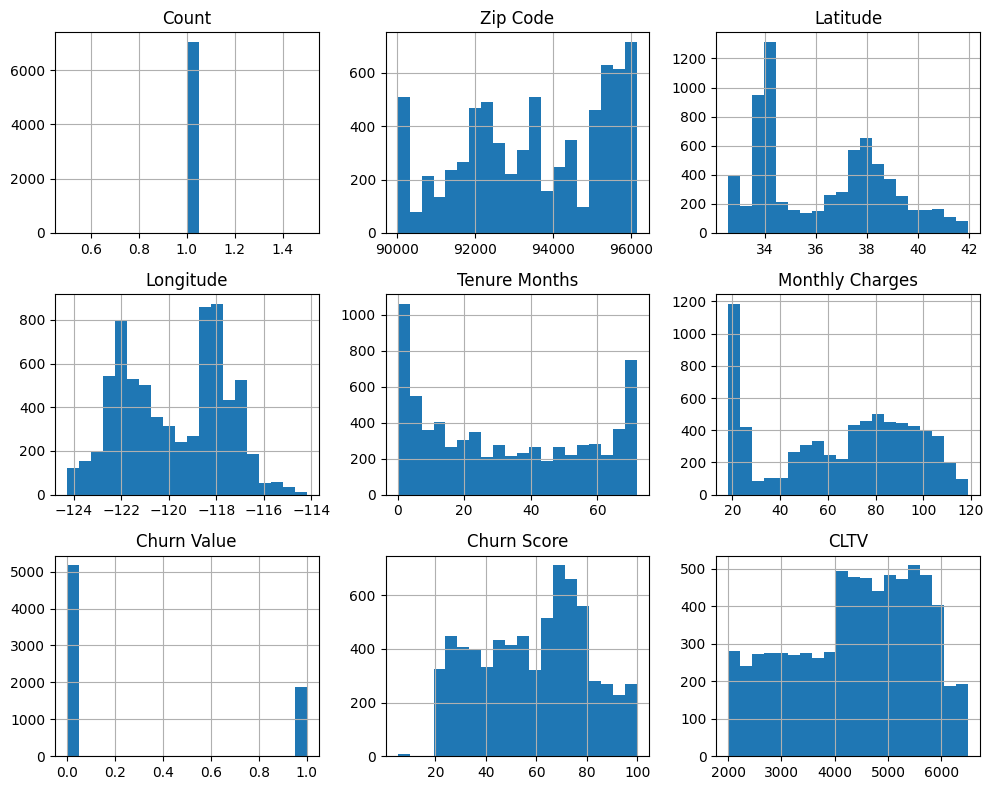

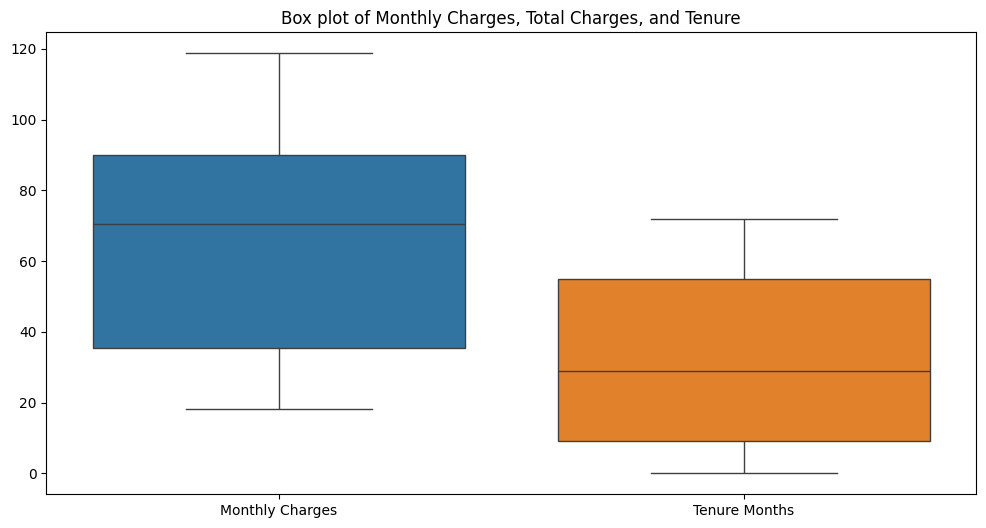

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numeric columns
print(data.describe())

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Histograms for numeric columns to understand their distribution
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Box plots for important features to detect outliers and understand data spread
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Monthly Charges', 'Total Charges', 'Tenure Months']])
plt.title('Box plot of Monthly Charges, Total Charges, and Tenure')
plt.show()


## Handle missing data by checking for missing values and imputing them if necessary.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Define the imputer to fill missing values with the median for numeric columns
imputer = SimpleImputer(strategy='median')

# Select numeric columns to apply imputation
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Verify that missing values have been filled
print("\nMissing values after imputation:\n", data.isnull().sum())


Missing values in each column:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Missing values after imputation:
 CustomerID              0
Count                   0
Country   

## Categorical Encoding – Convert categorical features to numerical values.

In [ ]:
# Convert categorical columns like 'Gender', 'Internet Service', 'Contract', 'Payment Method' to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'Internet Service', 'Contract', 'Payment Method'], drop_first=True)

# Display the first few rows of the updated dataset to verify encoding
print(data_encoded.head())


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK    1.0  United States  California  Los Angeles   90003.0   
1  9237-HQITU    1.0  United States  California  Los Angeles   90005.0   
2  9305-CDSKC    1.0  United States  California  Los Angeles   90006.0   
3  7892-POOKP    1.0  United States  California  Los Angeles   90010.0   
4  0280-XJGEX    1.0  United States  California  Los Angeles   90015.0   

                 Lat Long   Latitude   Longitude Senior Citizen  ...    CLTV  \
0  33.964131, -118.272783  33.964131 -118.272783             No  ...  3239.0   
1   34.059281, -118.30742  34.059281 -118.307420             No  ...  2701.0   
2  34.048013, -118.293953  34.048013 -118.293953             No  ...  5372.0   
3  34.062125, -118.315709  34.062125 -118.315709             No  ...  5003.0   
4  34.039224, -118.266293  34.039224 -118.266293             No  ...  5340.0   

                    Churn Reason  Gender_Male Internet Service_Fiber optic

## Feature Scaling – Normalize or standardize features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler for standardization
scaler = StandardScaler()

# List of features to scale (e.g., 'Monthly Charges' and 'Tenure Months')
features_to_scale = ['Monthly Charges', 'Tenure Months']

# Apply scaling to the selected features
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])

# Display the first few rows of the dataset to verify scaling
print(data_encoded[features_to_scale].head())


   Monthly Charges  Tenure Months
0        -0.362660      -1.236724
1         0.197365      -1.236724
2         1.159546      -0.992402
3         1.330711      -0.177995
4         1.294151       0.677133


# Step 2: Exploratory Data Analysis (EDA)

## Correlation Matrix – Generate a correlation heatmap to understand relationships between features and the target variable (Churn).

Non-numeric columns found: Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Paperless Billing',
       'Total Charges', 'Churn Label', 'Churn Reason', 'Gender_Male',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')


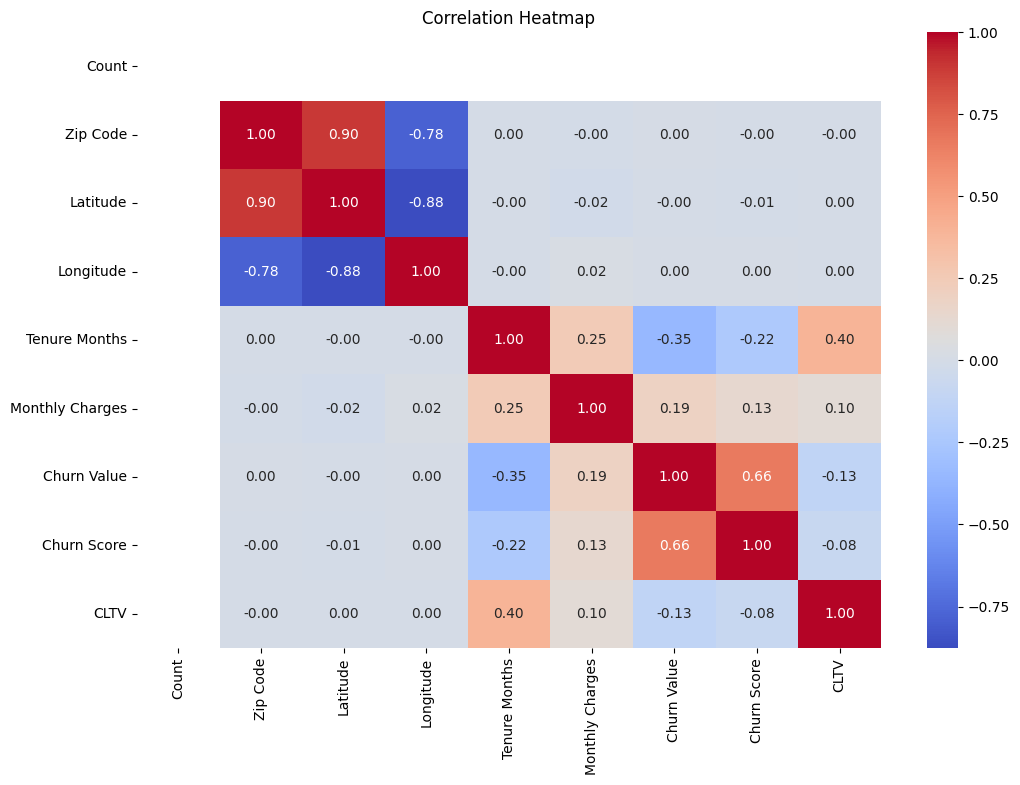

In [ ]:
# Check for non-numeric columns
data_for_corr = data_encoded.copy()
non_numeric_columns = data_for_corr.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns found:", non_numeric_columns)

# Drop any remaining non-numeric columns
data_for_corr = data_for_corr.drop(columns=non_numeric_columns)

# Generate correlation matrix for the numeric columns
correlation_matrix = data_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Set title for the heatmap
plt.title('Correlation Heatmap')
plt.show()


## Distribution Analysis – Plot the distribution of the target variable (Churn) to check for class imbalance.

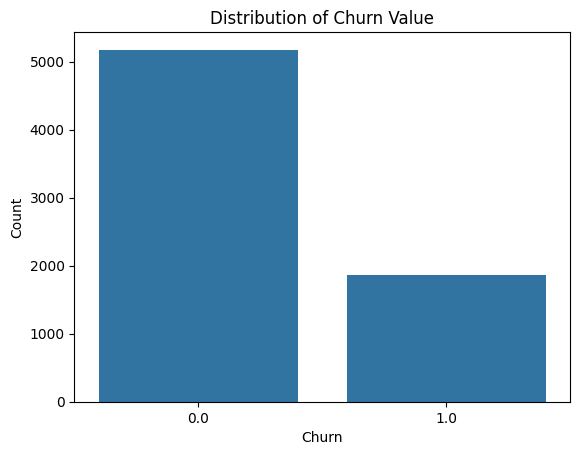

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'Churn Value'
sns.countplot(x='Churn Value', data=data)

# Add title and labels
plt.title('Distribution of Churn Value')
plt.xlabel('Churn')
plt.ylabel('Count')

# Display the plot
plt.show()


##  Feature Importance – Use statistical techniques to explore the impact of each feature on churn.

Top Features by Importance:
                                                Feature  Coefficient  \
9344                                    Churn Label_Yes     2.039986   
6                                           Churn Score     1.065671   
9345            Churn Reason_Attitude of support person     0.586380   
9351                            Churn Reason_Don't know     0.497806   
9348  Churn Reason_Competitor offered higher downloa...     0.496826   
9349          Churn Reason_Competitor offered more data     0.482891   
9347          Churn Reason_Competitor made better offer     0.457355   
9346         Churn Reason_Competitor had better devices     0.413630   
9362               Churn Reason_Product dissatisfaction     0.396289   
9363               Churn Reason_Service dissatisfaction     0.390728   

      Importance  
9344    2.039986  
6       1.065671  
9345    0.586380  
9351    0.497806  
9348    0.496826  
9349    0.482891  
9347    0.457355  
9346    0.413630  
9362    

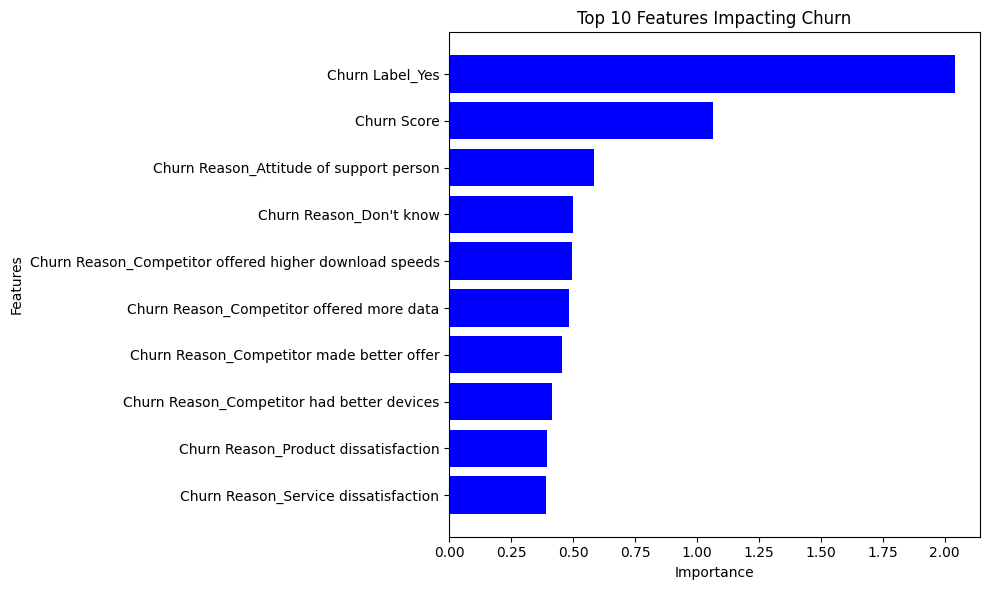

In [ ]:
from sklearn.linear_model import LogisticRegression
# Drop non-numeric columns (such as 'CustomerID')
X = data_encoded.drop(['Churn Value', 'CustomerID'], axis=1)  # Drop the target variable and any non-numeric columns

# Check for any remaining non-numeric columns and apply encoding
X = pd.get_dummies(X, drop_first=True)  # Encode any remaining categorical variables

# Standardize the features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_encoded['Churn Value'], test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Use X.columns to get the feature names
    'Coefficient': log_reg_model.coef_[0]
})

# Sort the features by absolute importance
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
print(feature_importance.head(10))

# Plot the top features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Impacting Churn')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top Features by Importance:
                                                Feature  Coefficient  \
9344                                    Churn Label_Yes     2.039986   
6                                           Churn Score     1.065671   
9345            Churn Reason_Attitude of support person     0.586380   
9351                            Churn Reason_Don't know     0.497806   
9348  Churn Reason_Competitor offered higher downloa...     0.496826   
9349          Churn Reason_Competitor offered more data     0.482891   
9347          Churn Reason_Competitor made better offer     0.457355   
9346         Churn Reason_Competitor had better devices     0.413630   
9362               Churn Reason_Product dissatisfaction     0.396289   
9363               Churn Reason_Service dissatisfaction     0.390728   

      Importance  
9344    2.039986  
6       1.065671  
9345    0.586380  
9351    0.497806  
9348    0.496826  
9349    0.482891  
9347    0.457355  
9346    0.413630  
9362    

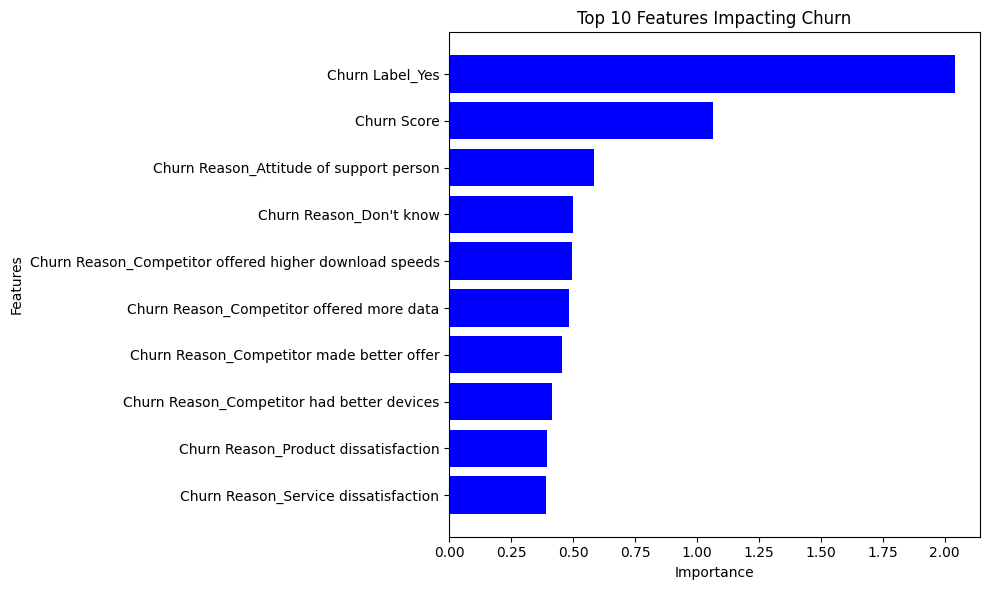

In [ ]:
# Drop non-numeric columns (such as 'CustomerID')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



X = data_encoded.drop(['Churn Value', 'CustomerID'], axis=1)  # Drop the target variable and any non-numeric columns

# Check for any remaining non-numeric columns and apply encoding
X = pd.get_dummies(X, drop_first=True)  # Encode any remaining categorical variables

# Standardize the features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_encoded['Churn Value'], test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg_model = LogisticRegression() # Now LogisticRegression is recognized
log_reg_model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Use X.columns to get the feature names
    'Coefficient': log_reg_model.coef_[0]
})

# Sort the features by absolute importance
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
print(feature_importance.head(10))

# Plot the top features

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Impacting Churn')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Step 3: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data_encoded.drop('Churn Value', axis=1)  # Features
y = data_encoded['Churn Value']  # Target variable (Churn)

# Split the data into training (80%) and testing (20%) sets, with stratification to ensure balance of the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the target variable in the training and testing sets
print("Churn distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nChurn distribution in testing set:")
print(y_test.value_counts(normalize=True))


Churn distribution in training set:
Churn Value
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Churn distribution in testing set:
Churn Value
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


##  Model Implementation

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (already done before)
# data_encoded = pd.read_csv('path_to_your_file.csv')

# Step 1: Drop non-numeric columns (like 'CustomerID')
X = data_encoded.drop(['CustomerID', 'Churn Value'], axis=1)  # Drop non-numeric columns and target

# Step 2: Convert categorical variables into numeric values using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Handle any missing values (if any)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Step 4: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_encoded['Churn Value'], test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression Model
log_reg_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_model.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate
y_pred = log_reg_model.predict(X_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8985

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1009
         1.0       0.74      1.00      0.85       400

    accuracy                           0.90      1409
   macro avg       0.87      0.93      0.89      1409
weighted avg       0.92      0.90      0.90      1409


Confusion Matrix:
[[867 142]
 [  1 399]]


## Hyperparameter Tuning – Use cross-validation to find the best hyperparameters for the logistic regression model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],        # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.01, 0.1, 1, 10, 100]    # Regularization strength
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_log_reg_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_log_reg_model.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test Set Accuracy: 1.0000
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
[[1009    0]
 [   0  400]]


##  Regularization – Use L1 (Lasso) or L2 (Ridge) Regularization

In [ ]:
# L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=1)
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)

print("L1 (Lasso) Regularization Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l1):.4f}")
print(classification_report(y_test, y_pred_l1))
print(confusion_matrix(y_test, y_pred_l1))

# L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, C=1)
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)

print("\nL2 (Ridge) Regularization Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l2):.4f}")
print(classification_report(y_test, y_pred_l2))
print(confusion_matrix(y_test, y_pred_l2))


L1 (Lasso) Regularization Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

[[1009    0]
 [   0  400]]

L2 (Ridge) Regularization Results:
Accuracy: 0.8985
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1009
         1.0       0.74      1.00      0.85       400

    accuracy                           0.90      1409
   macro avg       0.87      0.93      0.89      1409
weighted avg       0.92      0.90      0.90      1409

[[867 142]
 [  1 399]]


# Step 5: Model Evaluation

## Confusion Matrix – Evaluate the model using a confusion matrix to identify the number of true positives, true negatives, false positives, and false negatives.

Confusion Matrix:
[[1009    0]
 [   0  400]]


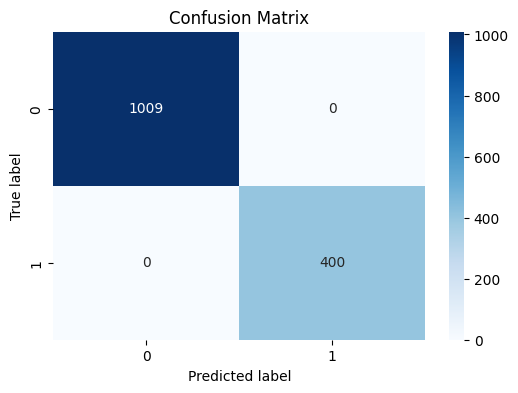

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the best logistic regression model
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Accuracy, Precision, Recall, and F1-Score – Calculate these performance metrics to evaluate the classifier.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



## ROC Curve and AUC – Plot the ROC curve and compute the area under the curve (AUC).

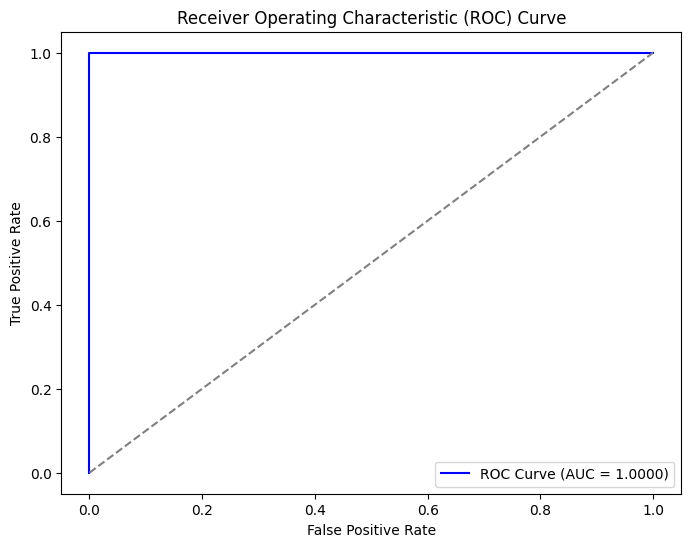

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba = best_log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Handle Class Imbalance – Address class imbalance using techniques like class resampling.

### Option 1: Using Class Weights in Logistic Regression

In [ ]:
# Logistic Regression with class weighting to handle class imbalance
log_reg_model_balanced = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', random_state=42)
log_reg_model_balanced.fit(X_train, y_train)

# Make predictions on the test set
y_pred_balanced = log_reg_model_balanced.predict(X_test)

# Evaluate the model with class weighting
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy with Class Weighting: {accuracy_balanced:.4f}")
print("\nClassification Report with Class Weighting:")
print(classification_report(y_test, y_pred_balanced))


Accuracy with Class Weighting: 0.9056

Classification Report with Class Weighting:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      1009
         1.0       0.75      1.00      0.86       400

    accuracy                           0.91      1409
   macro avg       0.88      0.93      0.89      1409
weighted avg       0.93      0.91      0.91      1409



### Option 2:-Oversampling the Minority Class (Using SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled data
log_reg_model_smote = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_smote = log_reg_model_smote.predict(X_test)

# Evaluate the model with SMOTE oversampling
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy with SMOTE: {accuracy_smote:.4f}")
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Accuracy with SMOTE: 0.9006

Classification Report with SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      1009
         1.0       0.74      1.00      0.85       400

    accuracy                           0.90      1409
   macro avg       0.87      0.93      0.89      1409
weighted avg       0.93      0.90      0.90      1409



# Step 6: Model Interpretation

Feature Coefficients – Analyze the coefficients of the logistic regression model to interpret feature importance.

In [ ]:
# Check if 'Total Charges' has been split
print(data_encoded['Total Charges'].unique())  # Look at unique values in 'Total Charges'

# If 'Total Charges' is numeric, it should not be split like this. Ensure that it's treated as continuous.
# Example: Convert 'Total Charges' to numeric if needed (if any values are incorrectly formatted)
data_encoded['Total Charges'] = pd.to_numeric(data_encoded['Total Charges'], errors='coerce')

# After ensuring that 'Total Charges' is numeric, proceed with the scaling
X = data_encoded.drop(['Churn Value', 'CustomerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Continue with logistic regression training as before


[108.15 151.65 820.5 ... 7362.9 346.45 6844.5]


# Step 7: Model Optimization

## Regularization – Experiment with L1 (Lasso) and L2 (Ridge) Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_train, y_train)

# Logistic Regression with L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_l2.fit(X_train, y_train)

# Predictions
y_pred_l1 = log_reg_l1.predict(X_test)
y_pred_l2 = log_reg_l2.predict(X_test)

# Evaluate L1 (Lasso) Model
print("L1 (Lasso) Regularization Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l1):.4f}")
print(classification_report(y_test, y_pred_l1))
print(confusion_matrix(y_test, y_pred_l1))

# Evaluate L2 (Ridge) Model
print("\nL2 (Ridge) Regularization Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_l2):.4f}")
print(classification_report(y_test, y_pred_l2))
print(confusion_matrix(y_test, y_pred_l2))


L1 (Lasso) Regularization Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

[[1009    0]
 [   0  400]]

L2 (Ridge) Regularization Results:
Accuracy: 0.8985
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1009
         1.0       0.74      1.00      0.85       400

    accuracy                           0.90      1409
   macro avg       0.87      0.93      0.89      1409
weighted avg       0.92      0.90      0.90      1409

[[867 142]
 [  1 399]]


## Threshold Adjustment – Adjust the Decision Threshold

Results with Threshold = 0.4:
Accuracy: 0.8722
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      1009
         1.0       0.69      1.00      0.82       400

    accuracy                           0.87      1409
   macro avg       0.84      0.91      0.86      1409
weighted avg       0.91      0.87      0.88      1409

[[830 179]
 [  1 399]]


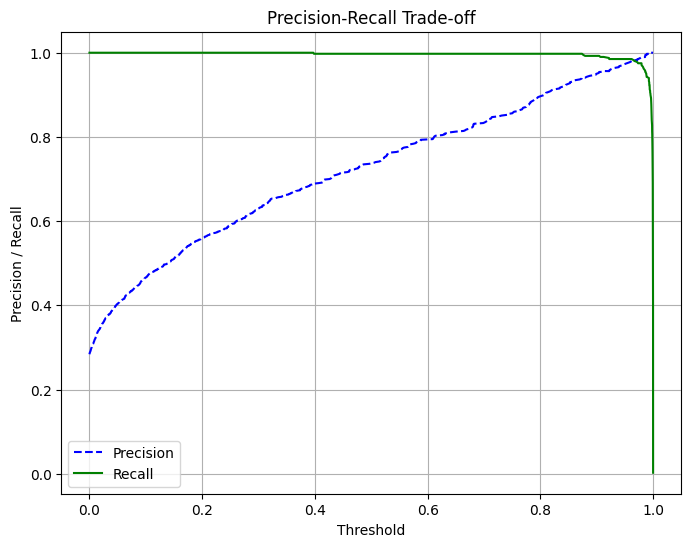

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities for the positive class (Churn)
y_pred_proba = log_reg_l2.predict_proba(X_test)[:, 1]

# Define a new threshold (e.g., 0.4)
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(f"Results with Threshold = {threshold}:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(classification_report(y_test, y_pred_adjusted))
print(confusion_matrix(y_test, y_pred_adjusted))

# Plot Precision-Recall Curve to help choose the threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.grid(True)
plt.show()


# Step 8: Visualizations

## Churn Probability Plot – Visualize the predicted probabilities of churn for customers using a histogram.

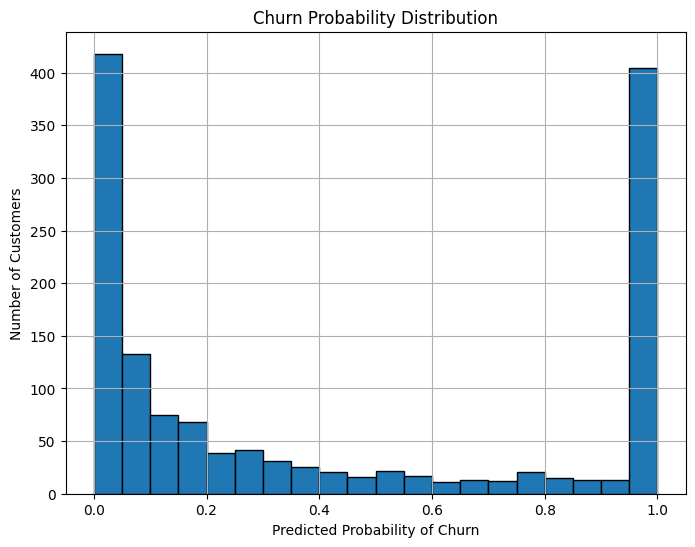

In [ ]:
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (Churn)
y_pred_proba = log_reg_l2.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Churn)

# Plot a histogram of the predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, edgecolor='k')
plt.title('Churn Probability Distribution')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


## Important Feature Visualization – Create bar plots or heatmaps to visualize the top features contributing to customer churn.

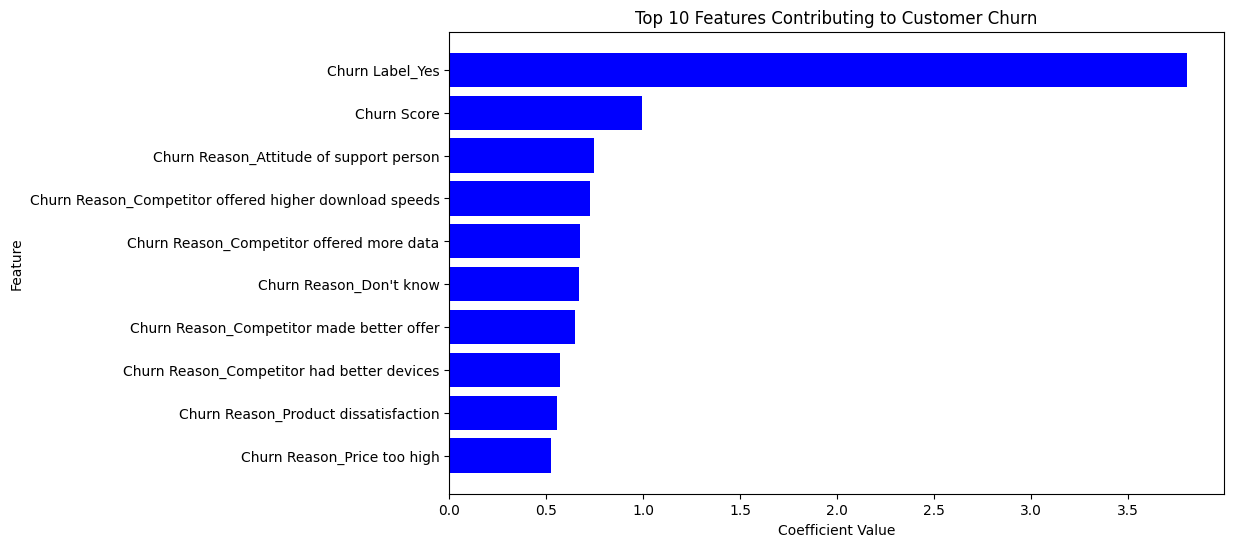

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Handle missing values using imputation (fill NaNs with the median)
X = pd.DataFrame(X)  # Ensure X is a DataFrame
imputer = SimpleImputer(strategy='median')  # Fill missing values with the median for numeric data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Apply the imputer to the feature matrix

# Step 2: Ensure that y_train and X have the same number of samples
X_imputed['y'] = y_train  # Temporarily add the target variable to X_imputed
X_imputed = X_imputed.dropna()  # Drop rows with missing target values
y_train = X_imputed['y']  # Extract the updated y_train after removing rows with NaNs
X_imputed = X_imputed.drop('y', axis=1)  # Remove the target column from X_imputed

# Step 3: Proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Fit the logistic regression model
log_reg_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_model.fit(X_scaled, y_train)

# Step 5: Get the coefficients and plot the top features
coefficients = log_reg_model.coef_[0]

# Create a DataFrame to visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': X_imputed.columns,  # Use the original feature names
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 6: Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Coefficient'].head(10), color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features Contributing to Customer Churn')
plt.gca().invert_yaxis()
plt.show()


# 4.	Predictions

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Sample dataset (replace with your actual dataset)
# Assume X is the feature matrix and y is the target (churn: 0 or 1)
# Replace this with your preprocessed data
# For illustration, we create a sample dataframe (use your actual data)
X = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'SeniorCitizen': [0, 1, 0, 1],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year']
})
y = [0, 1, 0, 1]  # Example target variable

# Preprocessing step (convert categorical variables to numerical using get_dummies)
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 2: Initialize and fit the StandardScaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Train the Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Function to get input from user
def get_customer_input():
    num_customers = int(input("Enter the number of new customers: "))
    customer_data = []

    for i in range(num_customers):
        print(f"\nEnter details for Customer {i+1}:")
        gender = input("Gender (Male/Female): ")
        senior_citizen = int(input("Senior Citizen (0 for No, 1 for Yes): "))
        monthly_charges = float(input("Monthly Charges: "))
        contract = input("Contract (Month-to-month/One year/Two year): ")

        customer_data.append({
            'Gender': gender,
            'SeniorCitizen': senior_citizen,
            'MonthlyCharges': monthly_charges,
            'Contract': contract
        })

    return pd.DataFrame(customer_data)

# Function to predict churn
def predict_churn(new_customers, log_reg_model, scaler, original_feature_names):
    # Step 2: Apply preprocessing (encoding and scaling)
    new_customers_encoded = pd.get_dummies(new_customers, drop_first=True)

    # Step 3: Align new customer data with original training features
    new_customers_encoded = new_customers_encoded.reindex(columns=original_feature_names, fill_value=0)

    # Step 4: Scale the new customer data using the previously fitted scaler
    new_customers_scaled = scaler.transform(new_customers_encoded)

    # Step 5: Predict churn likelihood using the trained model
    churn_probabilities = log_reg_model.predict_proba(new_customers_scaled)[:, 1]

    # Step 6: Add churn probability to the new customers DataFrame
    new_customers['Churn Probability'] = churn_probabilities

    # Output the results
    print("\nPredicted Churn Probabilities for New Customers:")
    print(new_customers[['Gender', 'SeniorCitizen', 'MonthlyCharges', 'Contract', 'Churn Probability']])

    # Provide insights
    for idx, row in new_customers.iterrows():
        if row['Churn Probability'] > 0.5:
            print(f"Customer {idx + 1} is likely to churn with a probability of {row['Churn Probability']:.2f}.")
        else:
            print(f"Customer {idx + 1} is unlikely to churn with a probability of {row['Churn Probability']:.2f}.")

# Example usage:
# Assuming 'log_reg_model' is your trained logistic regression model
# 'scaler' is your fitted StandardScaler
# 'X' is the original training data used to extract feature names

# Capture new customer input
new_customers = get_customer_input()

# Predict churn for new customers
predict_churn(new_customers, log_reg_model, scaler, X_encoded.columns)


Enter the number of new customers: 1

Enter details for Customer 1:
Gender (Male/Female): Female
Senior Citizen (0 for No, 1 for Yes): 0
Monthly Charges: 2349
Contract (Month-to-month/One year/Two year): Two year

Predicted Churn Probabilities for New Customers:
   Gender  SeniorCitizen  MonthlyCharges  Contract  Churn Probability
0  Female              0          2349.0  Two year           0.731602
Customer 1 is likely to churn with a probability of 0.73.
